In [ ]:
#Importaremos las bibliotecas a utilizar 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Para calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Tomaremos el URL de nuestra base de datos de la estacion climatologica 26061 ubicada en el municipio de NAVOJO SONORA.

url ="https://raw.githubusercontent.com/Abel-Lemus/Computacional-1-/main/Actividad5/26061.txt"

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python'

my_cols = ['Fecha', 'Precip', 'Evap', 'TMax', 'TMin']

df_Navojoa = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=2, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_Nav = df_Navojoa.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_Navja = df_Nav.replace(to_replace=str_Nulo, value='', regex=True)
# df_c.head()

# Vamos a convertir nuestros datos correspondientes a la estacion 26061 para poder trabajar con ellos
cols_list = ['Precip', 'Evap', 'TMax', 'TMin']
for cols in cols_list:
  df_Navja[cols] = pd.to_numeric(df_Navja[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_copia = df_Navja.copy()

# Ahora asignamos el formato fecha a nuestro trabajo 
df_copia['Fecha']=pd.to_datetime(df_copia['Fecha'], dayfirst=True).copy()


# Añadimos las columnas de año y mes ademas de la de fecha
df_copia["Año"] = df_copia["Fecha"].dt.year
df_copia["Mes"] = df_copia["Fecha"].dt.month

# definimos 
df_met = df_copia.copy()
df_met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25774 entries, 0 to 25773
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   25774 non-null  datetime64[ns]
 1   Precip  25738 non-null  float64       
 2   Evap    19130 non-null  float64       
 3   TMax    24841 non-null  float64       
 4   TMin    24836 non-null  float64       
 5   Año     25774 non-null  int64         
 6   Mes     25774 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.4 MB


*** Empezamos creando una serie de tiempo***

In [ ]:
# Hacemos una copia del último DataFrame para realizar nuevas operaciones
df_met_Navojoa = df_met.copy()
# Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_met_Navojoa = df_met_Navojoa.set_index('Fecha')

# Verificamos con ayuda del comando .info()
df_met_Navojoa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25774 entries, 1922-01-01 to 2016-04-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  25738 non-null  float64
 1   Evap    19130 non-null  float64
 2   TMax    24841 non-null  float64
 3   TMin    24836 non-null  float64
 4   Año     25774 non-null  int64  
 5   Mes     25774 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 1.4 MB


In [ ]:
print(df_met_Navojoa.head())
print(df_met_Navojoa.tail())

            Precip  Evap  TMax  TMin   Año  Mes
Fecha                                          
1922-01-01     0.0   NaN  24.0  16.0  1922    1
1922-01-02     0.0   NaN  24.0  16.8  1922    1
1922-01-03     0.0   NaN  24.8  16.8  1922    1
1922-01-04     0.0   NaN  24.0  10.0  1922    1
1922-01-05     0.0   NaN  21.0   7.3  1922    1
            Precip  Evap  TMax  TMin   Año  Mes
Fecha                                          
2016-04-25     0.0   9.2  34.5  16.5  2016    4
2016-04-26     0.0   9.0  33.0  16.5  2016    4
2016-04-27     0.0   9.1  33.5  14.0  2016    4
2016-04-28     0.0   9.2  32.5  14.0  2016    4
2016-04-29     0.0   9.1  31.5  15.0  2016    4


In [ ]:
# Seleccionaremos un conjunto de años de 31 años
df_50 = df_met_Navojoa[(df_met_Navojoa['Año'] >= 1922) & (df_met_Navojoa['Año'] < 1953)]
df_70 = df_met_Navojoa[(df_met_Navojoa['Año'] >= 1953) & (df_met_Navojoa['Año'] < 1985)]
df_90 = df_met_Navojoa[(df_met_Navojoa['Año'] >= 1985) & (df_met_Navojoa['Año'] < 2016)]

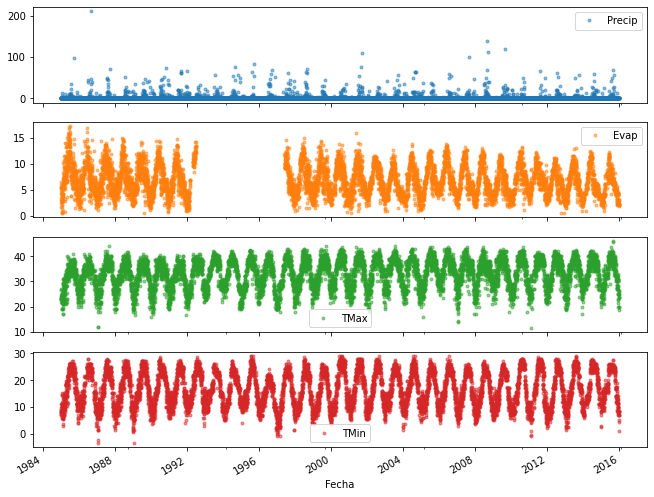

In [ ]:
# Podemos visualizar la colección de los últimos 30 años y ver si hay datos faltantes.
cols_plot = ['Precip', 'Evap', 'TMax', 'TMin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'TMax ºC', 'TMin (ºC)']
axes = df_90[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)

***ACTIVIDAD 1*** 

In [ ]:
#Explora tus datos de Precipitación los últimos años 1990- fin de datos.

#Grafica todo el rango de datos utilizando la función df.plot()

#Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos.

#Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot() 

Variación en Precipitación promedio 1985-2016 : -0.06318304759342341


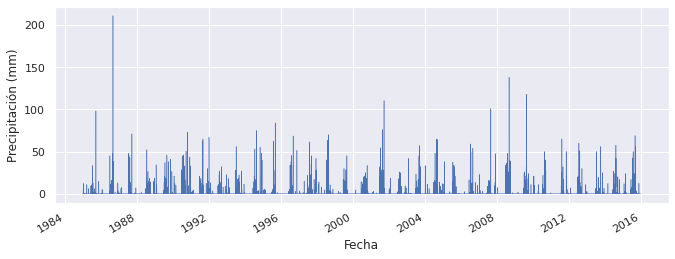

In [ ]:
# Graficamos la Precipitación de los últimos 31 años (1985 hasta 2016)
sns.set(rc={'figure.figsize':(11, 4)})
Precip_ave_50 = df_50.Precip.mean()
Precip_ave_70 = df_70.Precip.mean()
Precip_ave_90 = df_90.Precip.mean()

df_90['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');


print('Variación en Precipitación promedio 1985-2016 :', Precip_ave_70-Precip_ave_90)

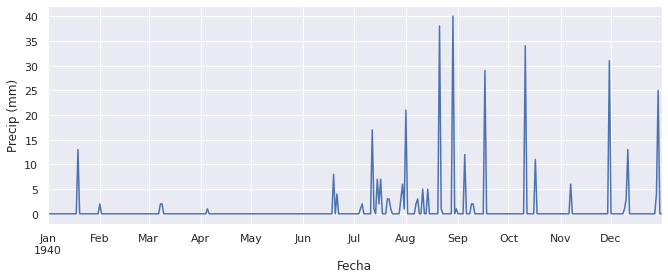

In [ ]:
#Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos. 

ax = df_50.loc['1940', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');

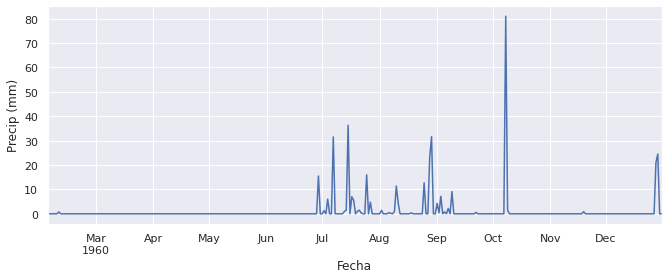

In [ ]:
#Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos. 

ax = df_70.loc['1960', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');

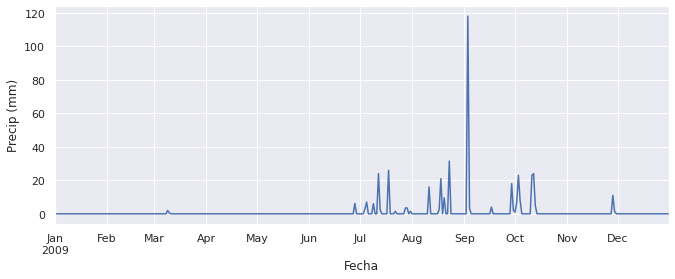

In [ ]:
#Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos. 

ax = df_90.loc['2009', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');

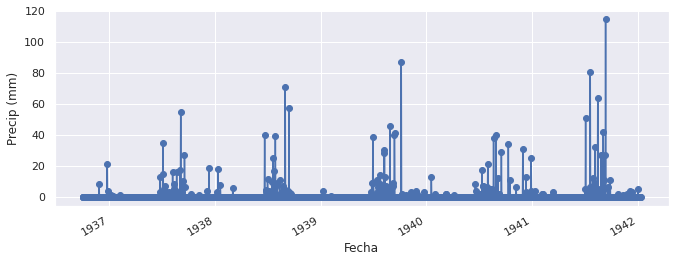

In [ ]:
# Investigando un periodo de datos
ax = df_50.loc['1935-01-11':'1942-01-11', 'Precip'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');

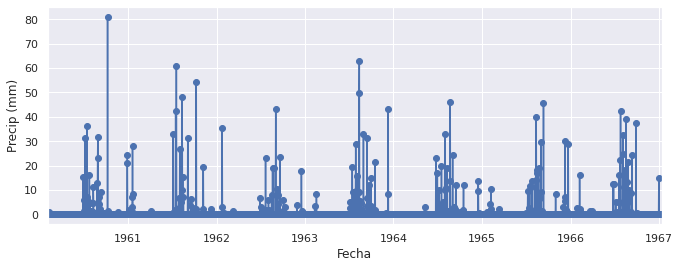

In [ ]:
# Investigando un periodo de datos
ax = df_70.loc['1960-01-11':'1967-01-11', 'Precip'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');

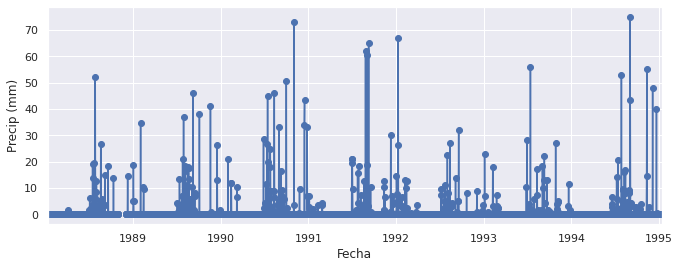

In [ ]:

# Investigando un periodo de datos
ax = df_90.loc['1988-01-11':'1995-01-11', 'Precip'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');

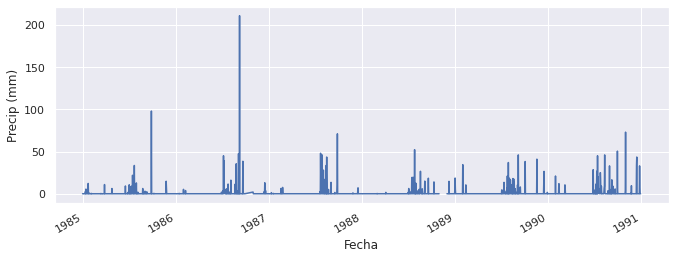

In [ ]:
# Investigando un rango de datos
ax = df_90.loc['1980':'1990', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');

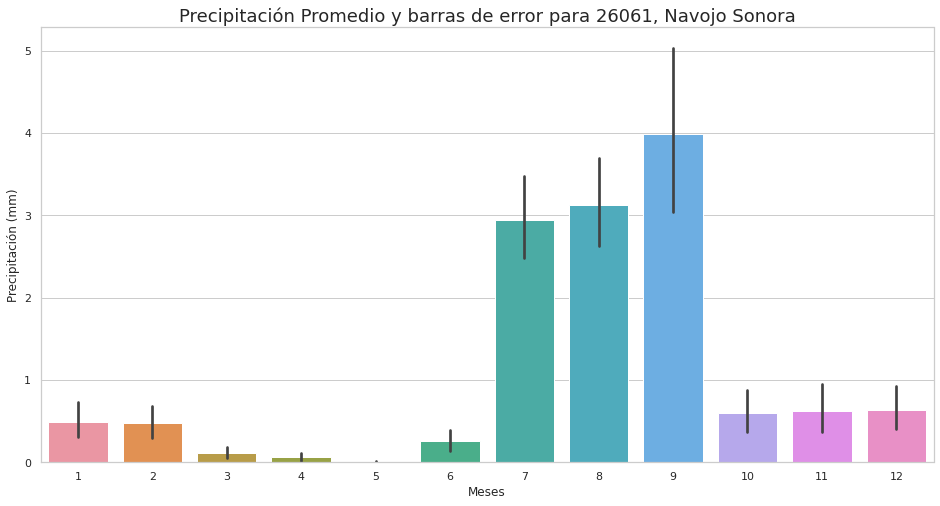

In [ ]:
# Gráfica de Precipitación últimos 31 años agrupada por mes
sns.set_style('whitegrid')

# Para poner la gráfica más grande
plt.figure(figsize=(16,8))

# la gráfica
g =sns.barplot(x='Mes', y='Precip', data=df_90);

#Etiquetas
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para 26061, Navojo Sonora', fontsize=18)

plt.show()

**ACTIVIDAD 2 **










Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas. 

Variación ºC TMax promedio 1985-2016 : 32.97114172519359


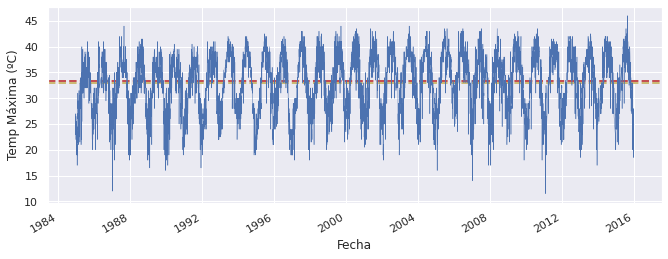

In [ ]:
#Graficamos la TMax de los últimos 31 años (1985 hasta 2016)
sns.set(rc={'figure.figsize':(11, 4)})
Tmax_ave_90 = df_90.TMax.mean()
Tmax_ave_70 = df_70.TMax.mean()
plt.axhline(Tmax_ave_90, color = 'y', linestyle='--', linewidth=2);
plt.axhline(Tmax_ave_70, color = 'r', linestyle='--', linewidth=2);
df_90['TMax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (ºC)');
print('Variación ºC TMax promedio 1985-2016 :', Tmax_ave_90)

Variación ºC TMin promedio 1995-2016 : 16.632762968299712


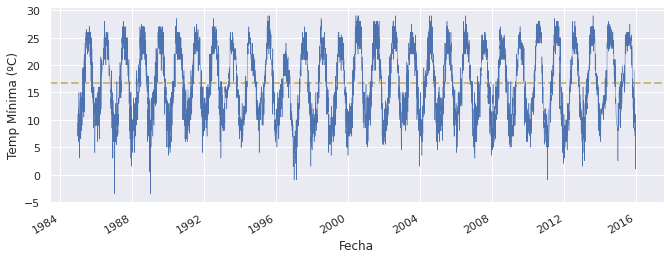

In [ ]:
# Graficamos la TMin de los últimos 30 años (1986-hasta 2016)
sns.set(rc={'figure.figsize':(11, 4)})
Tmin_ave_90 = df_90.TMin.mean()
plt.axhline(Tmin_ave_90, color = 'y', linestyle='--', linewidth=2);

df_90['TMin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (ºC)');
print('Variación ºC TMin promedio 1995-2016 :', Tmin_ave_90)

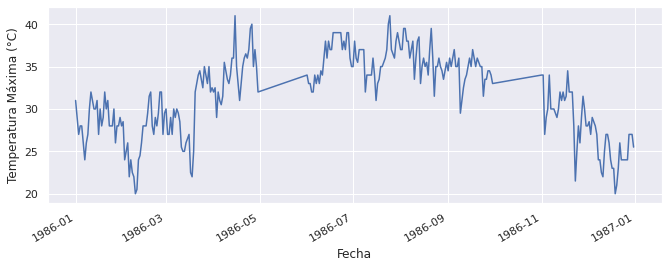

In [ ]:
# Analizaremos un año en espeficico de datos, nosotros obtamos por 1986
ax = df_90.loc['1986', 'TMax'].plot()
ax.set_ylabel('Temperatura Máxima (°C)');

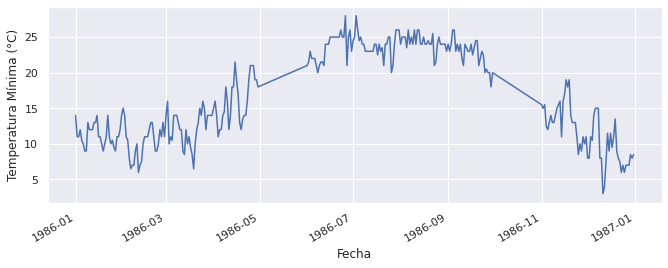

In [ ]:

# Investigando un año de datos
# Nosotros vamos a trabajar con el año de 1986
ax = df_90.loc['1986', 'TMin'].plot()
ax.set_ylabel('Temperatura Mínima (°C)');

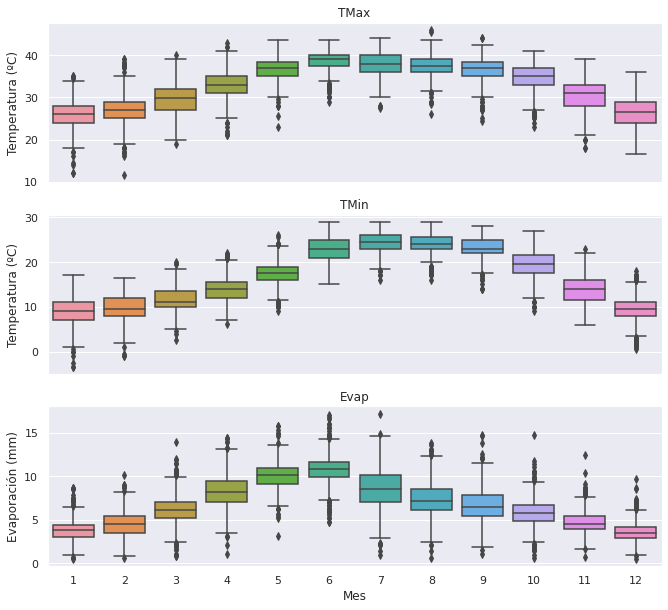

In [ ]:
#Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio.

# Dos gráficas en una
# Tendremos la grafica de la temperatura minima y maxima 
# Al igual que la grafica correspondiente a la evaporacion

fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['TMax', 'TMin', 'Evap'], axes):
  sns.boxplot(data=df_90, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temperatura (ºC)')
  else: 
    ax.set_ylabel('Evaporación (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

**Actividad 3.Realiza el mismo análisis que en la Actividad 2, pero para la variable de Evaporación.**

Variación mm Evaporación promedio 1953-1985 : 7.487908533184619


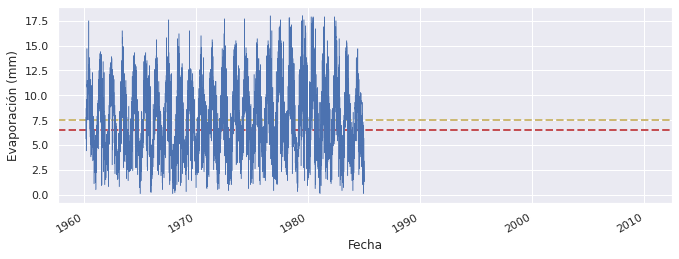

In [ ]:
# Graficamos la Evaporación en un diferencial de tiempo de 32 años (1953 hasta 1885)
sns.set(rc={'figure.figsize':(11, 4)})
Evap_ave_70 = df_70.Evap.mean()
Evap_ave_50 = df_50.Evap.mean()
plt.axhline(Evap_ave_70, color = 'y', linestyle='--', linewidth=2);
plt.axhline(Evap_ave_50, color = 'r', linestyle='--', linewidth=2);
df_70['Evap'].plot(linewidth=0.5);
plt.ylabel('Evaporación (mm)');
print('Variación mm Evaporación promedio 1953-1985 :', Evap_ave_70)

Variación mm Evaporación promedio 1985-2016 : 6.719564270152328


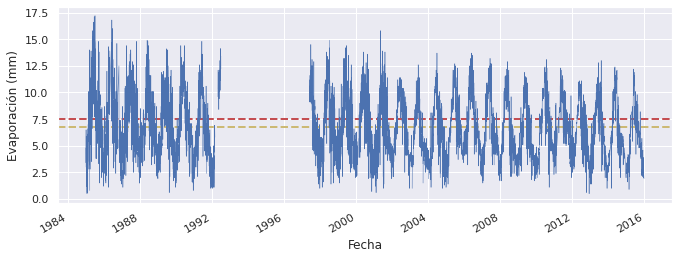

In [ ]:
# Graficamos la Evaporación de los últimos 31 años (1985 hasta 2016)
sns.set(rc={'figure.figsize':(11, 4)})
Evap_ave_90 = df_90.Evap.mean()
Evap_ave_70 = df_70.Evap.mean()
plt.axhline(Evap_ave_90, color = 'y', linestyle='--', linewidth=2);
plt.axhline(Evap_ave_70, color = 'r', linestyle='--', linewidth=2);
df_90['Evap'].plot(linewidth=0.5);
plt.ylabel('Evaporación (mm)');
print('Variación mm Evaporación promedio 1985-2016 :', Evap_ave_90)

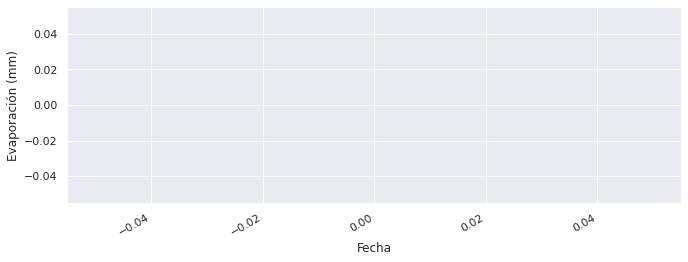

In [ ]:
# INVESTIGANDO UN RANGO DE DATOS EVAPORACION
ax = df_50.loc['1930':'1935', 'Evap'].plot()
ax.set_ylabel('Evaporación (mm)');

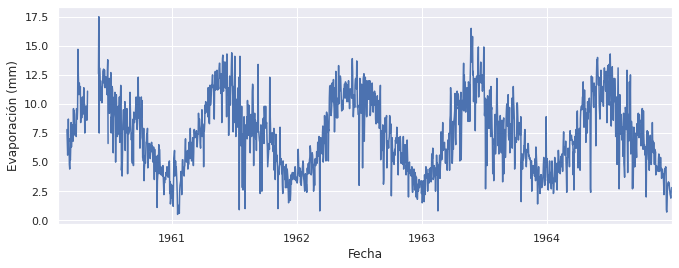

In [ ]:
# INVESTIGANDO UN RANGO DE DATOS EVAPORACION
ax = df_70.loc['1959':'1964', 'Evap'].plot()
ax.set_ylabel('Evaporación (mm)');

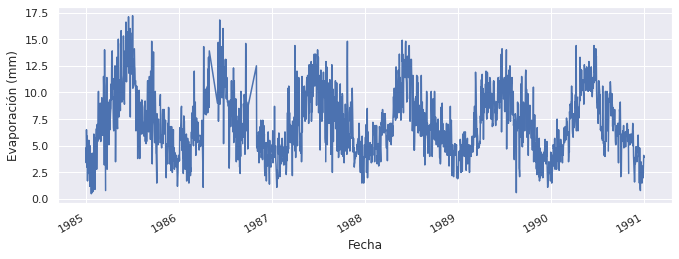

In [ ]:
# INVESTIGANDO UN RANGO DE DATOS EVAPORACION
ax = df_90.loc['1985':'1990', 'Evap'].plot()
ax.set_ylabel('Evaporación (mm)');

Actividad 4.  Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, utilizando la función df.rolling(). 

In [ ]:
# Suavizando la curva de TMax, utilizando Promedios Móviles (7,30 y 365 días)
data_cols = ['Evap', 'TMax', 'TMin']
df_90_7d = df_90[data_cols].rolling(7, center=True,min_periods=1).mean()
df_90_30d = df_90[data_cols].rolling(30, center=True, min_periods=1).mean()
df_90_365d = df_90[data_cols].rolling(365, center=True, min_periods=1).mean()

df_90_365d

,Evap,TMax,TMin
Fecha,,,
1985-01-01,8.416022,29.021858,14.833333
1985-01-02,8.464286,29.059783,14.894022
1985-01-03,8.474863,29.086486,14.943243
1985-01-04,8.500000,29.118280,14.997312
1985-01-05,8.524865,29.165775,15.050802
...,...,...,...
2015-12-27,5.586559,34.627717,19.611413
2015-12-28,5.579459,34.609290,19.581967
2015-12-29,5.570652,34.601648,19.549451


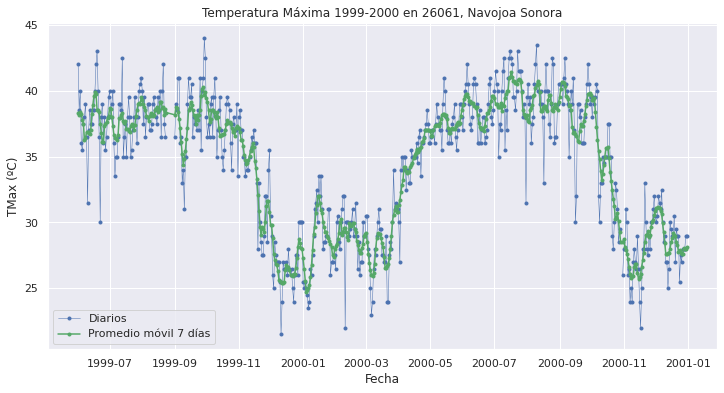

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1999-06', '2000-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'TMax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'TMax'], marker='.', color = "g" , linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('TMax (ºC)')
ax.set_title('Temperatura Máxima 1999-2000 en 26061, Navojoa Sonora')
ax.legend();

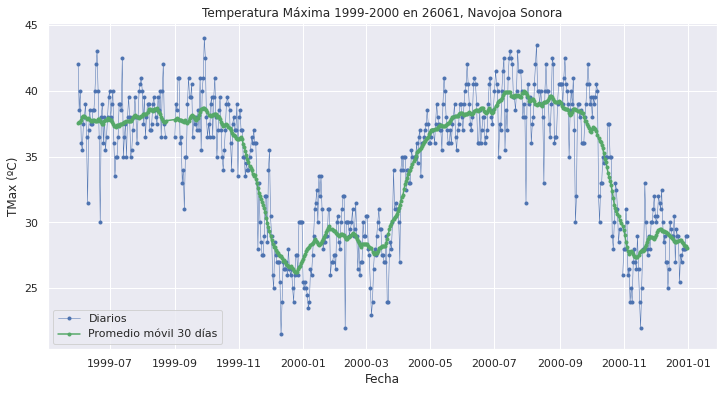

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1999-06', '2000-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'TMax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_30d.loc[start:end, 'TMax'], marker='.', color = "g" , linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('TMax (ºC)')
ax.set_title('Temperatura Máxima 1999-2000 en 26061, Navojoa Sonora')
ax.legend();

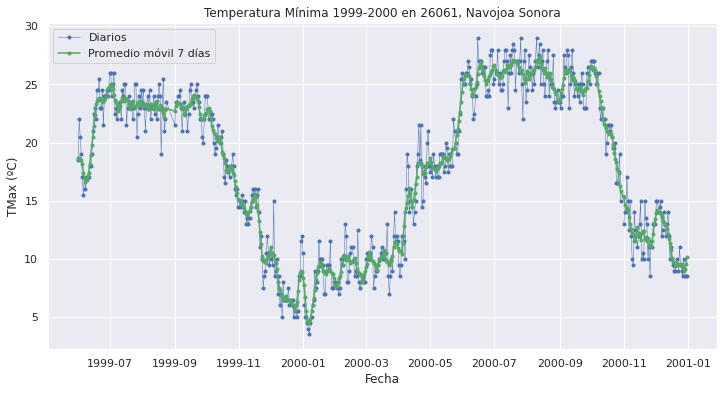

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1999-06', '2000-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'TMin'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'TMin'], marker='.', color = "g", linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('TMax (ºC)')
ax.set_title('Temperatura Mínima 1999-2000 en 26061, Navojoa Sonora')
ax.legend();

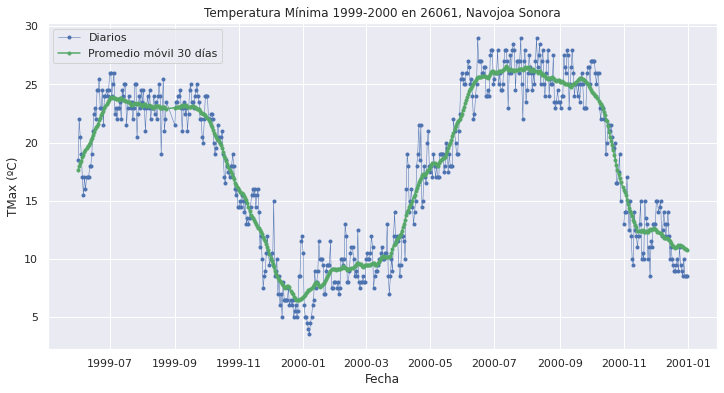

In [ ]:
# periodo de intervalo en el cual nos centraremos para investigar
start, end = '1999-06', '2000-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'TMin'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_30d.loc[start:end, 'TMin'], marker='.', color = "g" ,linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('TMax (ºC)')
ax.set_title('Temperatura Mínima 1999-2000 en 26061, Navojoa Sonora')
ax.legend();

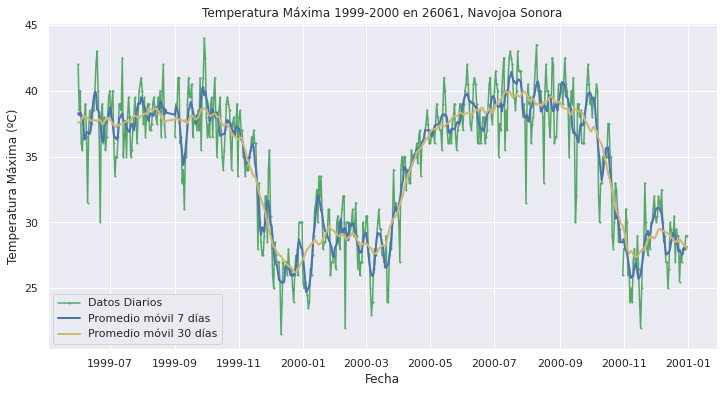

In [ ]:
# Intervalos de tiempo en los cuales trabajaremos 
start, end = '1999-06', '2000-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'TMax'],
marker='.', markersize=2, linestyle='-', color='g',label='Datos Diarios')
ax.plot(df_90_7d.loc[start:end, 'TMax'], linestyle='-', linewidth=2, label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'TMax'], linestyle='-', color= 'y', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura Máxima (ºC)')
ax.set_title('Temperatura Máxima 1999-2000 en 26061, Navojoa Sonora')
ax.legend();

Text(0.5, 1.0, 'Temperatura Mínima 1999-2000 en 26061, Navojoa Sonora')

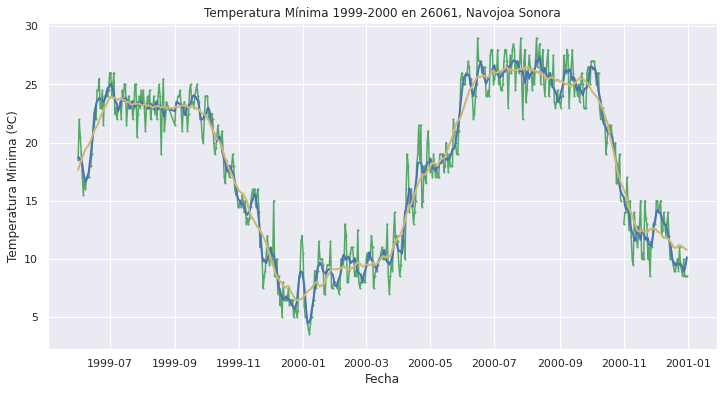

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1999-06', '2000-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'TMin'],
marker='.', markersize=2, linestyle='-', color='g',label='Datos Diarios')
ax.plot(df_90_7d.loc[start:end, 'TMin'], linestyle='-', linewidth=2, label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'TMin'], linestyle='-', color= 'y', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura Mínima (ºC)')
ax.set_title('Temperatura Mínima 1999-2000 en 26061, Navojoa Sonora')

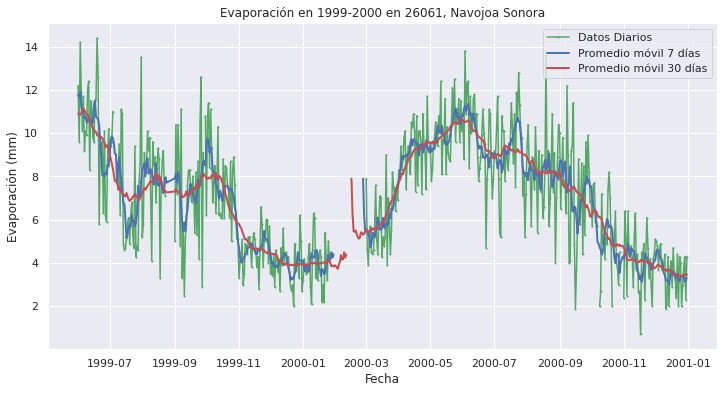

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1999-06', '2000-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Evap'],
marker='.', markersize=2, linestyle='-', color='g',label='Datos Diarios')
ax.plot(df_90_7d.loc[start:end, 'Evap'], linestyle='-', linewidth=2, label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Evap'], linestyle='-', color= 'r', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evaporación (mm)')
ax.set_title('Evaporación en 1999-2000 en 26061, Navojoa Sonora')
ax.legend();

In [ ]:
#Exploraremos para 10 años o mas de datos

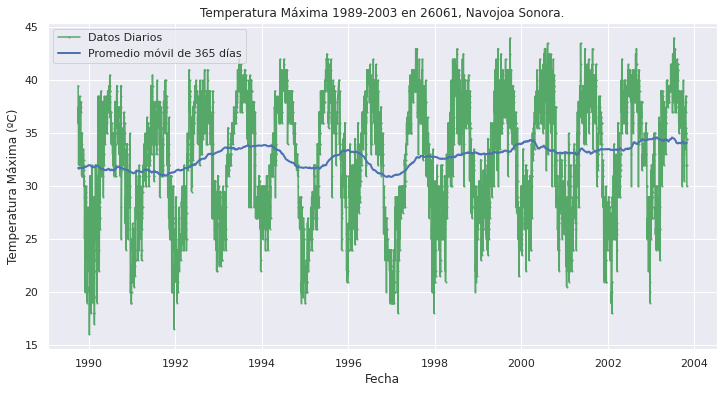

In [ ]:
# Fechas de inicio y fin, para filtrar la información
# Nosotros elegimos el intervalo de tiempo de 1989 a 2003 
# El cual es un intervalo de 14 años
start, end = '1989-10', '2003-10'

# Contraste de la gráfica de datos diarios y promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'TMax'],
marker='.', markersize=2, linestyle='-', color='g',label='Datos Diarios')
ax.plot(df_90_365d.loc[start:end, 'TMax'], linestyle='-', linewidth=2, label='Promedio móvil de 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura Máxima (ºC)')
ax.set_title('Temperatura Máxima 1989-2003 en 26061, Navojoa Sonora.')
ax.legend();

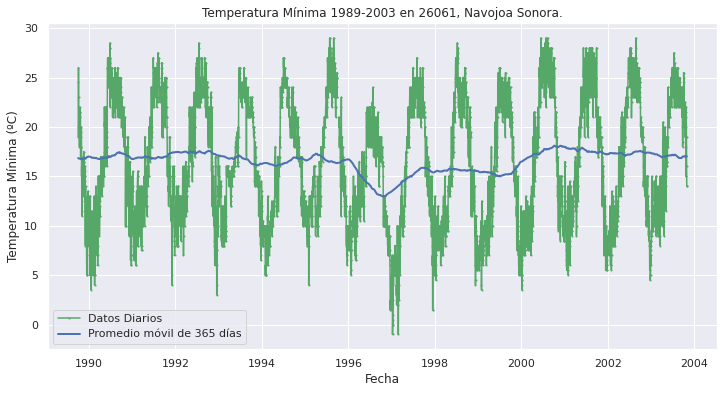

In [ ]:
#Realizamos el mismo procedimiento pero ahora para la temperatura minima 

# Fechas de inicio y fin, para filtrar la información
start, end = '1989-10', '2003-10'

# Contraste de la gráfica de datos diarios y promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'TMin'],
marker='.', markersize=2, linestyle='-', color='g',label='Datos Diarios')
ax.plot(df_90_365d.loc[start:end, 'TMin'], linestyle='-', linewidth=2, label='Promedio móvil de 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura Mínima (ºC)')
ax.set_title('Temperatura Mínima 1989-2003 en 26061, Navojoa Sonora.')
ax.legend();

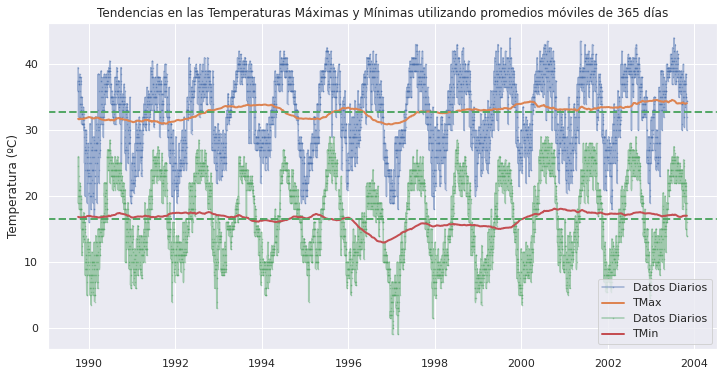

In [ ]:
# Graficas de promedios móviles de 365 días para las variables de las Temperaturas  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '1989-10', '2003-10'

fig, ax = plt.subplots()
for nm in ['TMax', 'TMin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1 , linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_90_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color = 'g', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Máximas y Mínimas utilizando promedios móviles de 365 días');

In [ ]:
# Repetiremos los mismos procedimientos pero para la evaporacion
# Los años que elegimos fueron de 1989 a 2003 
# Que corresponden a un intervalo de 14 años 

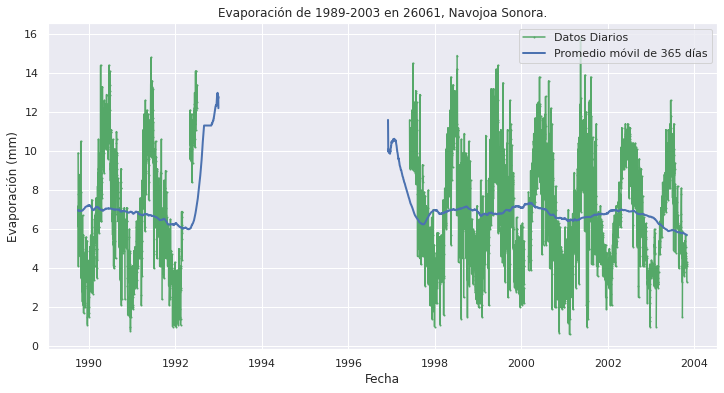

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1989-10', '2003-10'

# Contraste de la gráfica de datos diarios y promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Evap'],
marker='.', markersize=2, linestyle='-', color='g',label='Datos Diarios')
ax.plot(df_90_365d.loc[start:end, 'Evap'], linestyle='-', linewidth=2, label='Promedio móvil de 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evaporación (mm)')
ax.set_title('Evaporación de 1989-2003 en 26061, Navojoa Sonora.')
ax.legend();

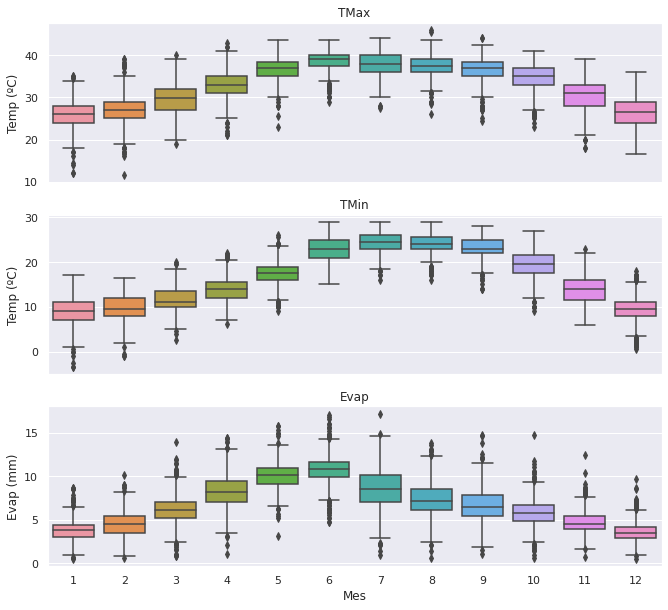

In [ ]:
# Analizando Estacionalidad de los datos
# Un proceso similar a los anteriores 
# Tendremos las graficas de temperatura maxima, minima y evaporacion 
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['TMax', 'TMin', 'Evap'], axes):
  sns.boxplot(data=df_90, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

**Actividad 5. Utiliza la biblioteca statsmodels.tsa de Python, para realizar una descomposición de una serie de tiempo: Serie Observada = Tendencia + Estacionalidad + Residuo.**

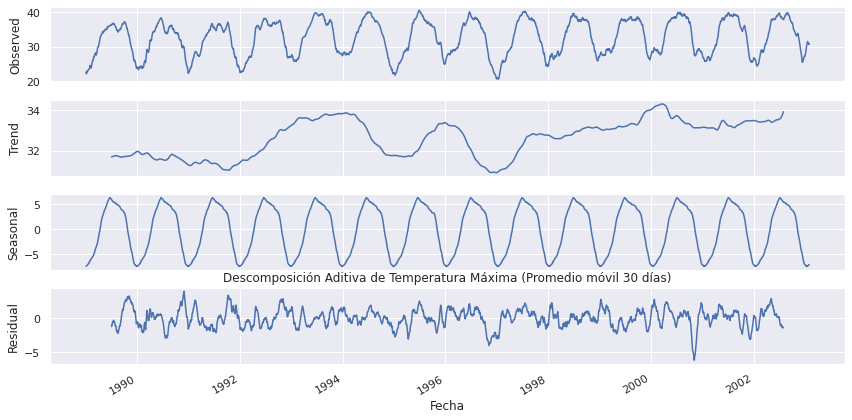

In [ ]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1989-01', '2003-01'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'TMax'].interpolate(), freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Máxima (Promedio móvil 30 días)');

count    4760.000000
mean       32.626608
std         0.906512
min        30.867123
25%        31.738356
50%        32.853425
75%        33.373973
max        34.365753
Name: TMax, dtype: float64

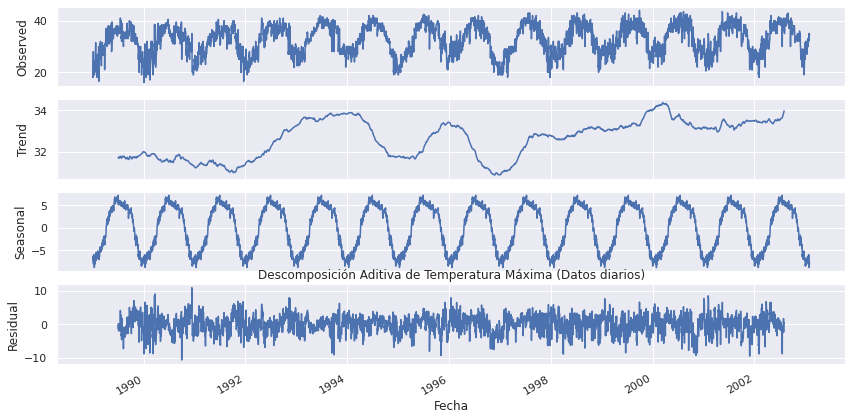

In [ ]:
# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1989-01', '2003-01'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'TMax'].interpolate(), freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Máxima (Datos diarios)');

resTmax.trend.describe()

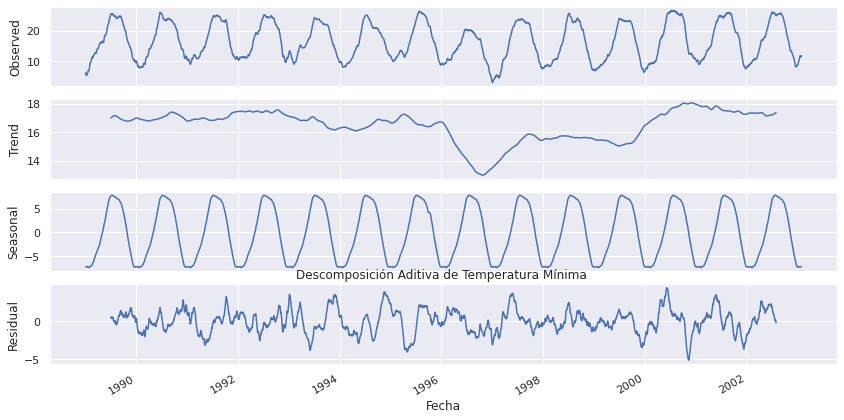

In [ ]:
# Ahora con la temperatura minima 

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1989-01', '2003-01'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmin = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'TMin'].interpolate(), freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Mínima ');

count    4760.000000
mean       16.453651
std         1.091980
min        12.978950
25%        15.698560
50%        16.815479
75%        17.246751
max        18.053406
Name: TMin, dtype: float64

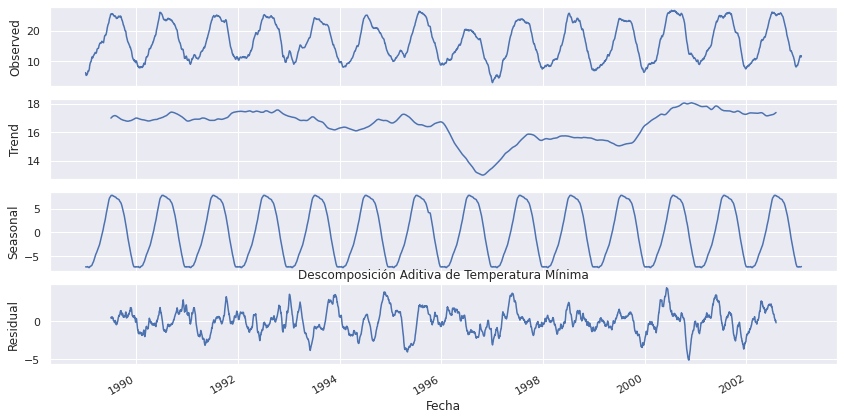

In [ ]:
# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1989-01', '2003-01'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmin = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'TMin'].interpolate(), freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Mínima');


resTmin.trend.describe()

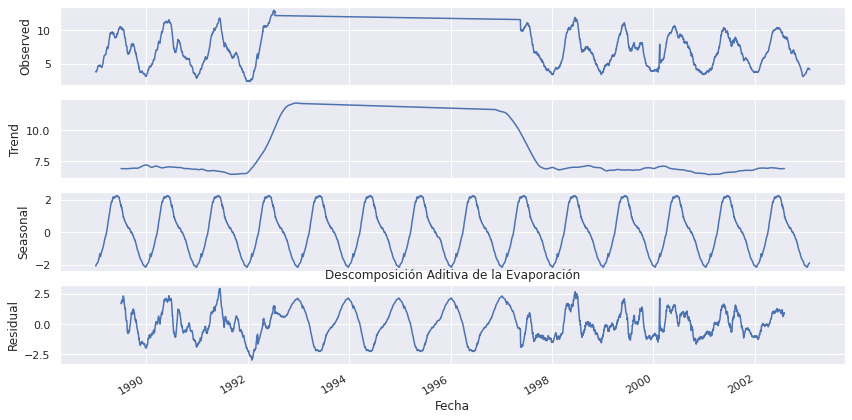

In [ ]:
# Por ultimo realizaremos un procedimiento similar pero para la evaporacion



# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1989-01', '2003-01'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resEvap = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Evap'].interpolate(), freq=decompfreq, model='additive')
resEvap.plot()

plt.title('Descomposición Aditiva de la Evaporación');

count    4760.000000
mean        8.769401
std         2.363862
min         6.372055
25%         6.865616
50%         7.064384
75%        11.767815
max        12.164155
Name: Evap, dtype: float64

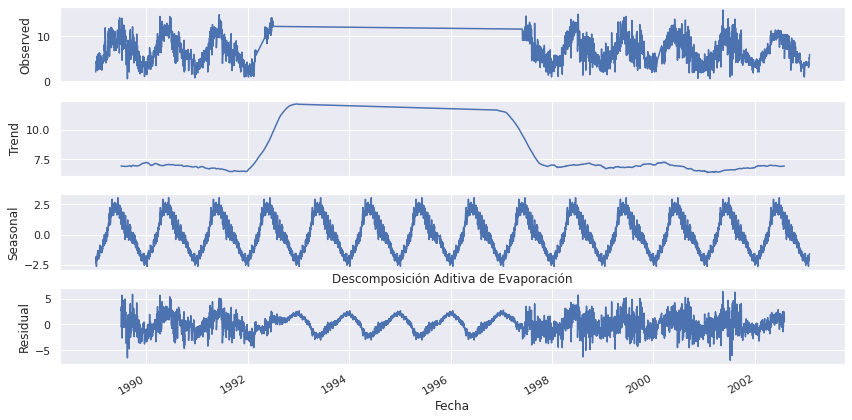

In [ ]:
# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1989-01', '2003-01'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resEvap = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Evap'].interpolate(), freq=decompfreq, model='additive')
resEvap.plot()

plt.title('Descomposición Aditiva de Evaporación');

resEvap.trend.describe()

Actividad 6. Por favor explora visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas de dos periodos de 30 años contiguos. Utiliza la función de Seaborn: sns.distplot. Agrega una línea vertical punteada indicando el valor del promedio de cada grupo de datos.  

 

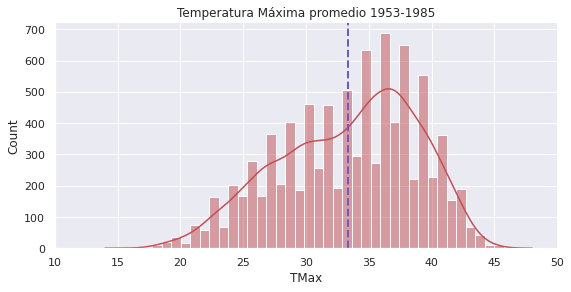

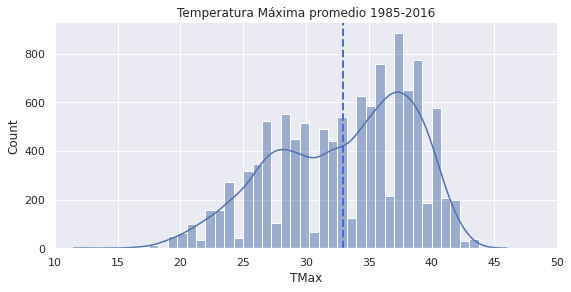

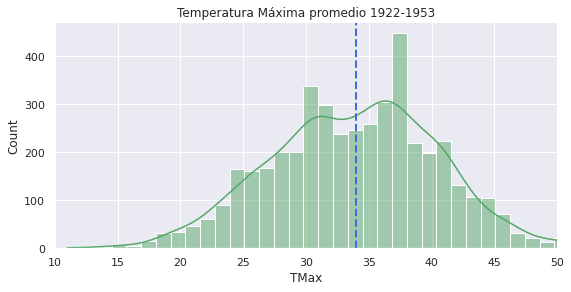

Temperatura máxima promedio del periodo 1922-1953 =  34.01214870546459 ºC
Temperatura máxima promedio del periodo 1953-1985 =  33.37141914917005 ºC
Temperatura máxima promedio del periodo 1985-2016 = 32.97114172519359 ºC
Distribución de la Temperatura Máxima del periodo 1922- 1953=  6.830169044125511 ºC
Distribución de la Temperatura Máxima del periodo 1953-1985 =  5.4768201973737 ºC
Distribución de la Temperatura Máxima del periodo 1985-2016 =  5.518708722458824 ºC


In [ ]:

# Gráfica de distribuciones de Temperaturas Tmax 

g1 = sns.displot(df_70.TMax, kde=True, color='r', height=4, aspect=2);
plt.axvline(df_70.TMax.mean(), linestyle='--', linewidth=2, color='slateblue');

g2 = sns.displot(df_90.TMax, kde=True, color='b', height=4, aspect=2);
plt.axvline(df_90.TMax.mean(), linestyle='--', linewidth=2, color='royalblue');

g3 = sns.displot(df_50.TMax, kde=True, color='g', height=4, aspect=2);
plt.axvline(df_50.TMax.mean(), linestyle='--', linewidth=2, color='royalblue')

g1.set(title='Temperatura Máxima promedio 1953-1985');
g2.set(title='Temperatura Máxima promedio 1985-2016');
g3.set(title='Temperatura Máxima promedio 1922-1953');

g1.set(xlim=(10,50))
g2.set(xlim=(10,50))
g3.set(xlim=(10,50))


plt.show();
print('Temperatura máxima promedio del periodo 1922-1953 = ', df_50.TMax.mean(), 'ºC' )
print('Temperatura máxima promedio del periodo 1953-1985 = ', df_70.TMax.mean(), 'ºC' )
print('Temperatura máxima promedio del periodo 1985-2016 =', df_90.TMax.mean(), 'ºC' )

print('Distribución de la Temperatura Máxima del periodo 1922- 1953= ', df_50.TMax.std(), 'ºC' )
print('Distribución de la Temperatura Máxima del periodo 1953-1985 = ', df_70.TMax.std(), 'ºC' )
print('Distribución de la Temperatura Máxima del periodo 1985-2016 = ', df_90.TMax.std(), 'ºC' )


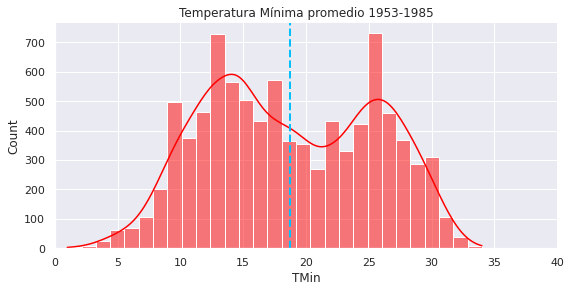

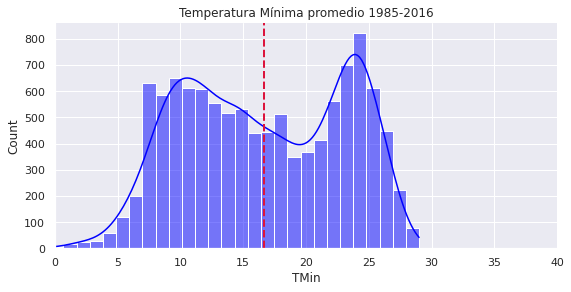

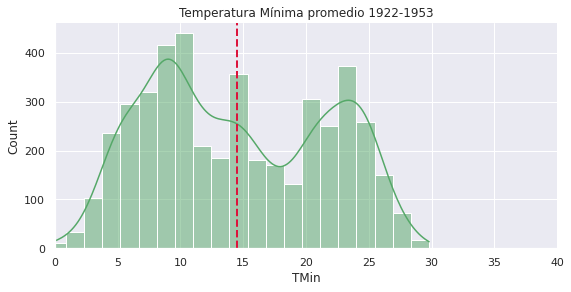

Temperatura mínima promedio del periodo 1922-1953 =  14.521314741035832 ºC
Temperatura mínima promedio del periodo 1953-1985 =  18.711028037383176 ºC
Temperatura mínima promedio del periodo 1985-2016 =  16.632762968299712 ºC
Distribución de la Temperatura Mínima del periodo 1922-1953 =  7.094692041748034 ºC
Distribución de la Temperatura Mínima del periodo 1953-1985 =  6.746322572517378 ºC
Distribución de la Temperatura Mínima del periodo 1985-2016 =  6.404369798835143 ºC


In [ ]:
# Hacemos el mismo procedimiento para la temperatura minima 



g1 = sns.displot(df_70.TMin, kde=True, color='red', height=4, aspect=2);
plt.axvline(df_70.TMin.mean(), linestyle='--', linewidth=2, color='deepskyblue');

g2 = sns.displot(df_90.TMin, kde=True, color='blue', height=4, aspect=2);
plt.axvline(df_90.TMin.mean(), linestyle='--', linewidth=2, color='crimson');


g3 = sns.displot(df_50.TMin, kde=True, color='g', height=4, aspect=2);
plt.axvline(df_50.TMin.mean(), linestyle='--', linewidth=2, color='crimson');

g1.set(title='Temperatura Mínima promedio 1953-1985');
g2.set(title='Temperatura Mínima promedio 1985-2016');
g3.set(title='Temperatura Mínima promedio 1922-1953');

g1.set(xlim=(0,40))
g2.set(xlim=(0,40))
g3.set(xlim=(0,40))

plt.show();

print('Temperatura mínima promedio del periodo 1922-1953 = ', df_50.TMin.mean(), 'ºC' )
print('Temperatura mínima promedio del periodo 1953-1985 = ', df_70.TMin.mean(), 'ºC' )
print('Temperatura mínima promedio del periodo 1985-2016 = ', df_90.TMin.mean(), 'ºC' )

print('Distribución de la Temperatura Mínima del periodo 1922-1953 = ', df_50.TMin.std(), 'ºC' )
print('Distribución de la Temperatura Mínima del periodo 1953-1985 = ', df_70.TMin.std(), 'ºC' )
print('Distribución de la Temperatura Mínima del periodo 1985-2016 = ', df_90.TMin.std(), 'ºC' )

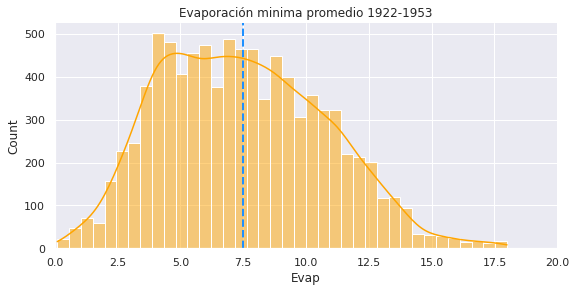

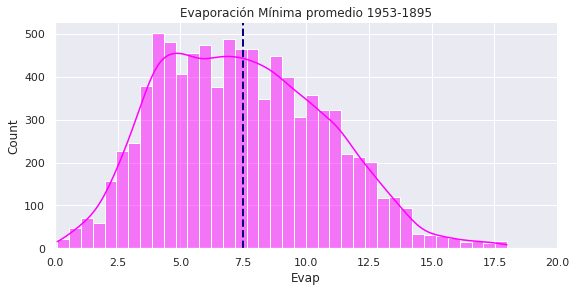

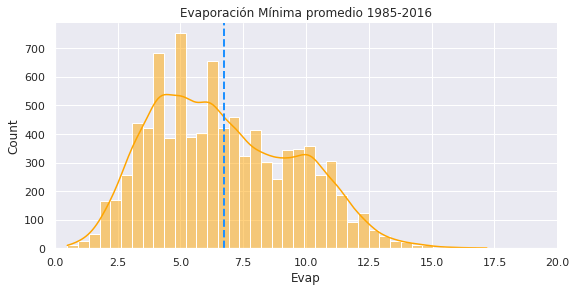

Evaporación promedio del periodo 1922-1953 =  6.504161849710985 mm
Evaporación promedio del periodo 1953-1985 =  7.487908533184619 mm
Evaporación promedio del periodo 1985-2016 =  6.719564270152328 mm
Distribución de la Evaporación del periodo 1922-1953 =  3.202061875034916 mm
Distribución de la Evaporación del periodo 1953-1985 =  3.2684953983801495 mm
Distribución de la Evaporación del periodo 1985-2016 =  2.8248162229110707 mm


In [ ]:
# Por ultimo se repitira el proceso para la evaporacion

g1 = sns.displot(df_70.Evap, kde=True, color='orange', height=4, aspect=2);
plt.axvline(df_70.Evap.mean(), linestyle='--', linewidth=2, color='dodgerblue');

g2 = sns.displot(df_70.Evap, kde=True, color='magenta', height=4, aspect=2);
plt.axvline(df_70.Evap.mean(), linestyle='--', linewidth=2, color='navy');

g3 = sns.displot(df_90.Evap, kde=True, color='orange', height=4, aspect=2);
plt.axvline(df_90.Evap.mean(), linestyle='--', linewidth=2, color='dodgerblue');


g1.set(title='Evaporación minima promedio 1922-1953');
g2.set(title='Evaporación Mínima promedio 1953-1895');
g3.set(title='Evaporación Mínima promedio 1985-2016');


g1.set(xlim=(0,20))
g2.set(xlim=(0,20))
g3.set(xlim=(0,20))

plt.show();

print('Evaporación promedio del periodo 1922-1953 = ', df_50.Evap.mean(), 'mm' )
print('Evaporación promedio del periodo 1953-1985 = ', df_70.Evap.mean(), 'mm' )
print('Evaporación promedio del periodo 1985-2016 = ', df_90.Evap.mean(), 'mm' )

print('Distribución de la Evaporación del periodo 1922-1953 = ', df_50.Evap.std(), 'mm' )
print('Distribución de la Evaporación del periodo 1953-1985 = ', df_70.Evap.std(), 'mm' )
print('Distribución de la Evaporación del periodo 1985-2016 = ', df_90.Evap.std(), 'mm' )